# Parameter exploration

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import pickle as pkl

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from policy_gradient import train, test
from models.model_base import FullyConnected, ConvNet
from snake import Snake
sns.set_style('darkgrid')

snake = Snake(rewards={'nothing':-10, 'bitten':-1, 'out':-1, 'food':10})

In [2]:
def average(Y, average_factor):
    Y_averaged = np.zeros(len(Y)//avg_factor)
    for i in range(len(Y_averaged)):
        Y_averaged[i] = np.mean(Y[avg_factor*i:avg_factor*(i+1)])
    return Y_averaged

## Batch size

In [3]:
n_input = 2 * snake.grid_size * snake.grid_size
model = FullyConnected(n_input=n_input, n_hidden=200, n_classes=4)

total_games = 20000
batch_sizes = [1, 10, 50, 100, 500]
lifetimes = []
fruits = []
times = []
for batch_size in batch_sizes:
    n_iterations = total_games//batch_size
    avg_lifetime, avg_fruits, total_time = train(
        model, snake, warm_restart=False,
        batch_size=batch_size, n_iterations=n_iterations,
        gamma=0.95, learning_rate=0.001, plot=False
    )
    lifetimes.append(avg_lifetime)
    fruits.append(avg_fruits)
    times.append(total_time)

Start training
Loading FullyConnected model


Lifetime: 23.0, Fruits: 1.0: 100%|██████████| 20000/20000 [03:27<00:00, 98.87it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 23.2, Fruits: 1.0: 100%|██████████| 2000/2000 [03:16<00:00,  7.58it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 31.82, Fruits: 2.56: 100%|██████████| 400/400 [03:00<00:00,  1.60it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 18.5, Fruits: 0.68: 100%|██████████| 200/200 [01:46<00:00,  1.05s/it] 


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 5.588, Fruits: 0.278: 100%|██████████| 40/40 [00:33<00:00,  1.02it/s]

Saving model to weights/weights_FullyConnected.p


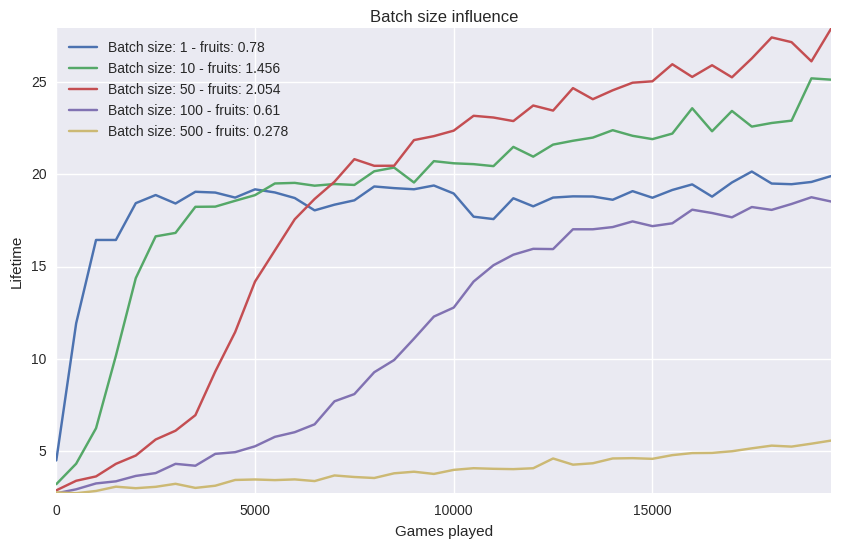

In [9]:
games_per_step = 500
plt.figure(figsize=(10,6))
for i in range(len(lifetimes)):
    avg_lifetime = lifetimes[i]
    avg_fruits = fruits[i]
    total_time = times[i]
    batch_size = batch_sizes[i]
    avg_factor = games_per_step//batch_size
    Y = average(avg_lifetime, avg_factor)
    X = [i * games_per_step for i in range(len(Y))]
    final_fruits = average(avg_fruits, avg_factor)[-1]
    plt.plot(X, Y, label='Batch size: {} - fruits: {} - time {}'.format(batch_size, final_fruits, total_time))

plt.xlabel('Games played')
plt.ylabel('Lifetime')
plt.legend(loc='upper left')
plt.title('Batch size influence')
plt.axis('tight')
plt.savefig('graphs/batch_size_dependence.png')
plt.show()

## Number of hidden units

In [10]:
total_games = 10000
n_hidden_list = [10, 50, 100, 200, 500]
batch_size = 10
n_frames = 2
n_iterations = total_games//batch_size
lifetimes = []
fruits = []
times = []
for n_hidden in n_hidden_list:
    n_input = n_frames * snake.grid_size * snake.grid_size
    model = FullyConnected(n_input=n_input, n_hidden=n_hidden, n_classes=4)
    
    avg_lifetime, avg_fruits, total_time = train(
        model, snake, warm_restart=False,
        batch_size=batch_size, n_iterations=n_iterations,
        gamma=0.95, learning_rate=0.001, plot=False
    )
    lifetimes.append(avg_lifetime)
    fruits.append(avg_fruits)
    times.append(total_time)

Start training
Loading FullyConnected model


Lifetime: 18.8, Fruits: 0.8: 100%|██████████| 1000/1000 [00:25<00:00, 38.75it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 22.0, Fruits: 1.4: 100%|██████████| 1000/1000 [00:50<00:00, 19.72it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 19.3, Fruits: 1.1: 100%|██████████| 1000/1000 [01:02<00:00, 16.07it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 23.9, Fruits: 1.3: 100%|██████████| 1000/1000 [01:06<00:00, 15.09it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 19.2, Fruits: 0.8: 100%|██████████| 1000/1000 [01:10<00:00, 10.86it/s]

Saving model to weights/weights_FullyConnected.p


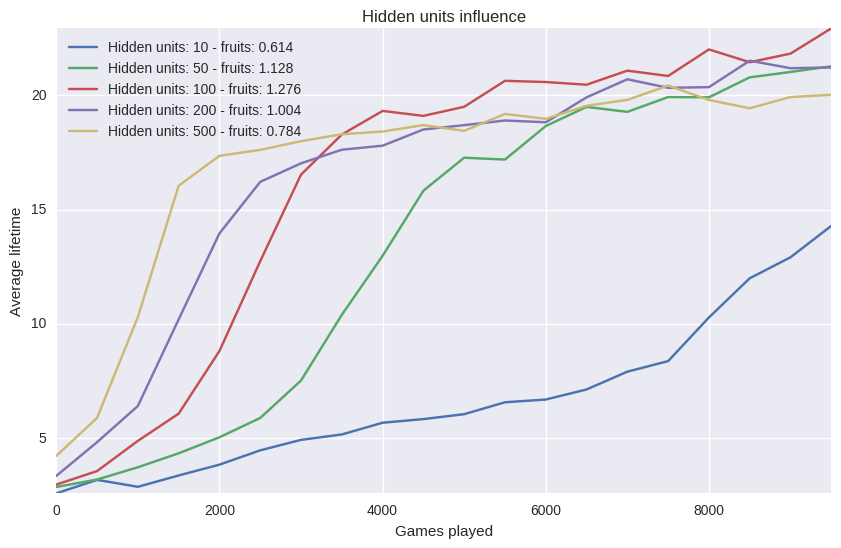

In [13]:
games_per_step = 500
avg_factor = games_per_step//batch_size
plt.figure(figsize=(10,6))
for i in range(len(lifetimes)):
    avg_lifetime = lifetimes[i]
    avg_fruits = fruits[i]
    total_time = times[i]
    n_hidden = n_hidden_list[i]

    Y = average(avg_lifetime, avg_factor)
    
    X = [i * games_per_step for i in range(len(Y))]
    final_fruits = average(avg_fruits, avg_factor)[-1]
    plt.plot(X, Y, label='Hidden units: {} - fruits: {}'.format(n_hidden, final_fruits, total_time))

plt.xlabel('Games played')
plt.ylabel('Average lifetime')
plt.legend(loc='upper left')
plt.title('Hidden units influence')
plt.axis('tight')
plt.savefig('graphs/hidden_units_dependence.png')
plt.show()

# Number of frames

In [9]:
total_games = 10000
n_frames_list = [1, 3, 5, 7]
batch_size = 10
n_hidden = 100
n_iterations = total_games//batch_size
lifetimes = []
fruits = []
times = []
for n_frames in n_frames_list:
    n_input = n_frames * snake.grid_size * snake.grid_size
    model = FullyConnected(n_input=n_input, n_hidden=n_hidden, n_classes=4)
    
    avg_lifetime, avg_fruits, total_time = train(
        model, snake, warm_restart=False, n_frames=n_frames,
        batch_size=batch_size, n_iterations=n_iterations,
        gamma=0.95, learning_rate=0.001, plot=False
    )
    lifetimes.append(avg_lifetime)
    fruits.append(avg_fruits)
    times.append(total_time)

Start training
Loading FullyConnected model


Lifetime: 21.4, Fruits: 1.5: 100%|██████████| 1000/1000 [01:27<00:00, 11.44it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 29.2, Fruits: 1.9: 100%|██████████| 1000/1000 [01:24<00:00, 11.79it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 28.7, Fruits: 1.7: 100%|██████████| 1000/1000 [01:48<00:00,  6.20it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 48.7, Fruits: 4.3: 100%|██████████| 1000/1000 [02:20<00:00,  6.00it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 21.5, Fruits: 0.9: 100%|██████████| 1000/1000 [01:26<00:00,  6.76it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 43.7, Fruits: 3.6: 100%|██████████| 1000/1000 [01:58<00:00,  5.74it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 38.5, Fruits: 3.3: 100%|██████████| 1000/1000 [01:59<00:00,  3.24it/s]

Saving model to weights/weights_FullyConnected.p


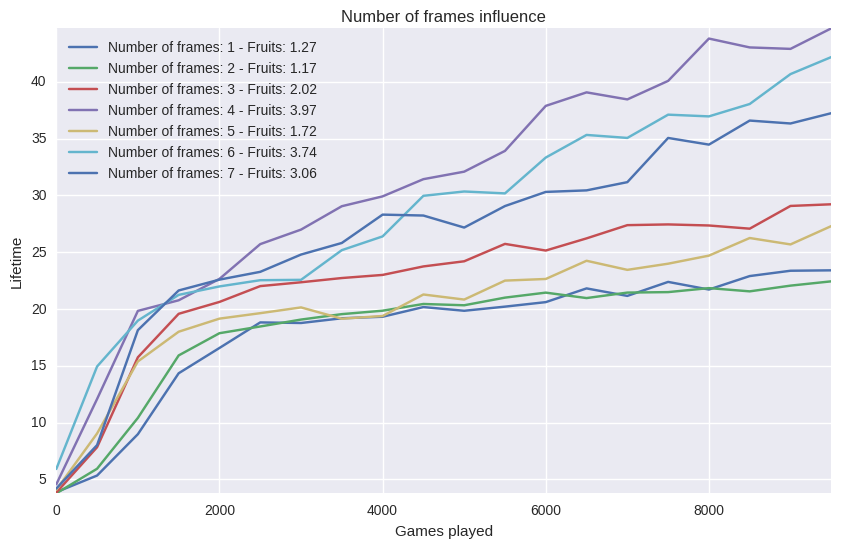

In [16]:
games_per_step = 500
avg_factor = games_per_step//batch_size
plt.figure(figsize=(10,6))
for i in range(len(lifetimes)):
    avg_lifetime = lifetimes[i]
    avg_fruits = fruits[i]
    n_frames = n_frames_list[i]
    Y = average(avg_lifetime, avg_factor)
    X = [i * games_per_step for i in range(len(Y))]
    final_fruits = average(avg_fruits, avg_factor)[-1]
    plt.plot(X, Y, label='Number of frames: {} - Fruits: {num:.2f}'.format(n_frames, num=final_fruits))

plt.xlabel('Games played')
plt.ylabel('Lifetime')
plt.legend(loc='upper left')
plt.title('Number of frames influence')
plt.axis('tight')
plt.savefig('graphs/number_of_frames_dependence.png')
plt.show()

# Influence of gamma (discount factor)

In [15]:
total_games = 10000
gamma_list = [0.2, 0.5, 0.7, 0.9, 0.95, 1]
n_frames = 2
batch_size = 10
n_hidden = 100
n_iterations = total_games//batch_size
lifetimes = []
fruits = []
times = []
for gamma in (gamma_list):       
    n_input = n_frames * snake.grid_size * snake.grid_size
    model = FullyConnected(n_input=n_input, n_hidden=n_hidden, n_classes=4)
    
    avg_lifetime, avg_fruits, total_time = train(
        model, snake, warm_restart=False, n_frames=n_frames,
        batch_size=batch_size, n_iterations=n_iterations,
        gamma=0.95, learning_rate=0.001, plot=False
    )
    lifetimes.append(avg_lifetime)
    fruits.append(avg_fruits)
    times.append(total_time)

Start training
Loading FullyConnected model


Lifetime: 26.3, Fruits: 1.3: 100%|██████████| 1000/1000 [01:24<00:00,  6.60it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 20.8, Fruits: 1.4: 100%|██████████| 1000/1000 [01:02<00:00, 11.59it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 31.6, Fruits: 2.3: 100%|██████████| 1000/1000 [01:09<00:00, 10.40it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 18.3, Fruits: 1.6: 100%|██████████| 1000/1000 [01:02<00:00, 16.07it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 26.9, Fruits: 1.7: 100%|██████████| 1000/1000 [01:07<00:00,  6.40it/s]


Saving model to weights/weights_FullyConnected.p
Start training
Loading FullyConnected model


Lifetime: 21.2, Fruits: 0.7: 100%|██████████| 1000/1000 [01:10<00:00, 14.21it/s]

Saving model to weights/weights_FullyConnected.p


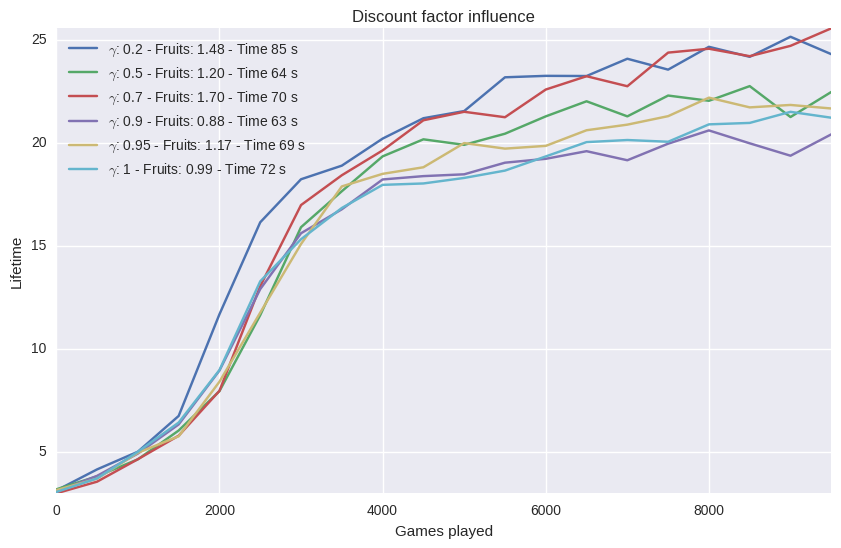

In [26]:
games_per_step = 500
avg_factor = games_per_step//batch_size
plt.figure(figsize=(10,6))
for i in range(len(lifetimes)):
    avg_lifetime = lifetimes[i]
    avg_fruits = fruits[i]
    total_time =  times[i]
    gamma = gamma_list[i]

    Y = average(avg_lifetime, avg_factor)
    X = [i * games_per_step for i in range(len(Y))]
    final_fruits = average(avg_fruits, avg_factor)[-1]
    plt.plot(X, Y, label='$\gamma$: {} - Fruits: {num:.2f} - Time {time:.0f} s'.format(gamma, num=final_fruits, time=total_time))

plt.xlabel('Games played')
plt.ylabel('Lifetime')
plt.legend(loc='upper left')
plt.title('Discount factor influence')
plt.axis('tight')
plt.savefig('graphs/number_of_frames_dependence.png')
plt.show()